In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'../data/')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [3]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [4]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y


Target Variable: wind_speed_mean
Training MAE: 0.6672390873911013
Training MSE: 0.5986385550410555
Training RMSE: 0.773717361212126
Training R2: 0.9847143944109011

Test MAE: 0.6872955844823534
Test MSE: 0.6275959664124766
Test RMSE: 0.7922095470344173
Test R2: 0.983089312828983



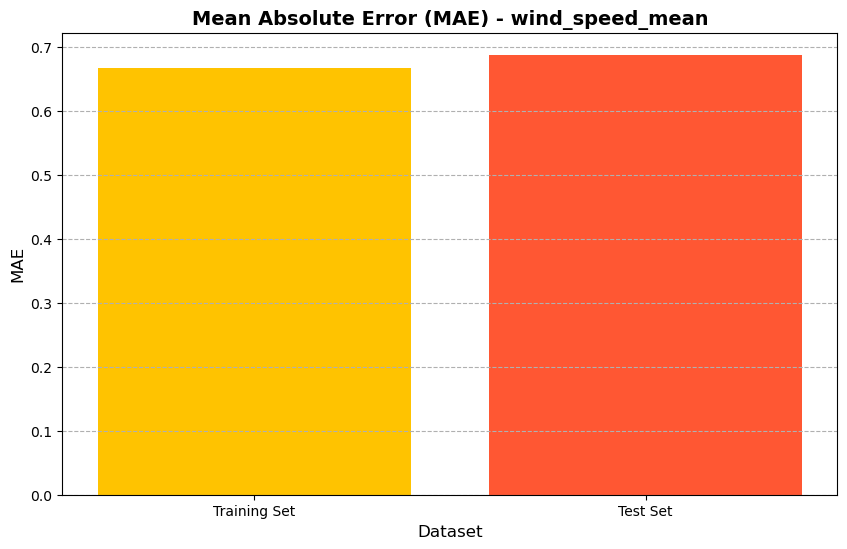

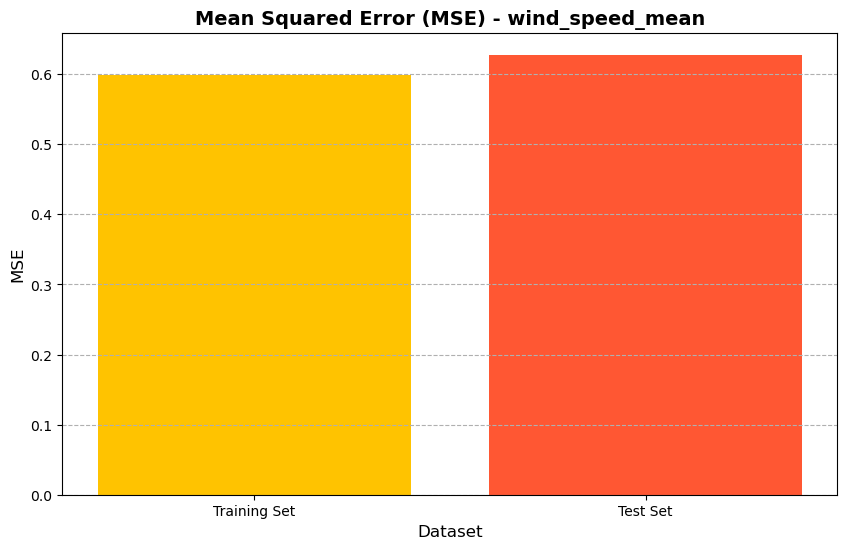

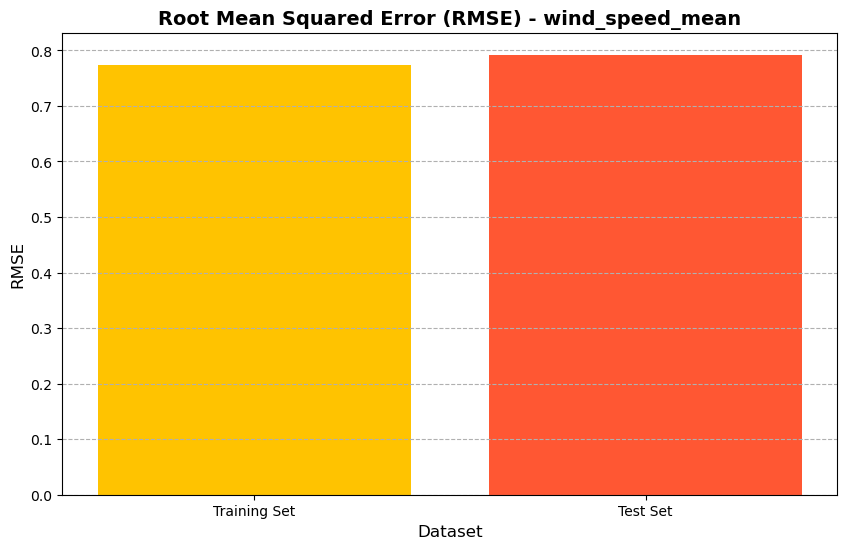

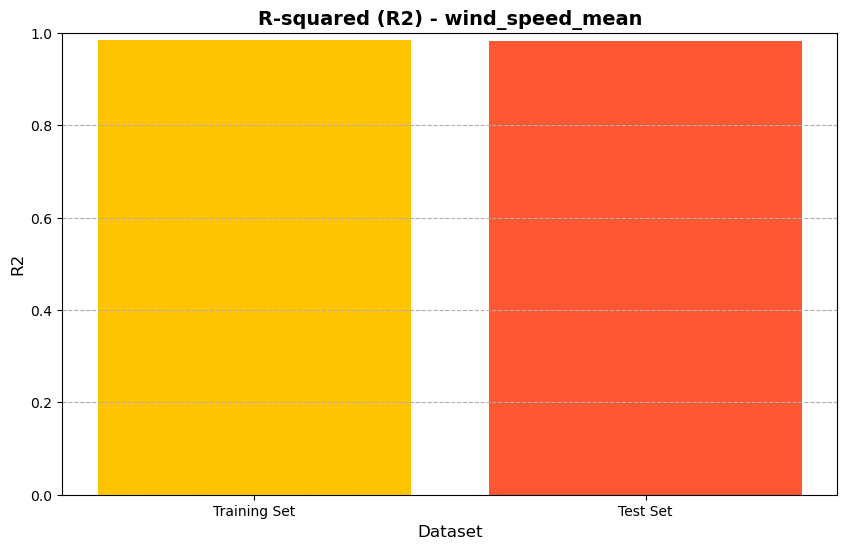

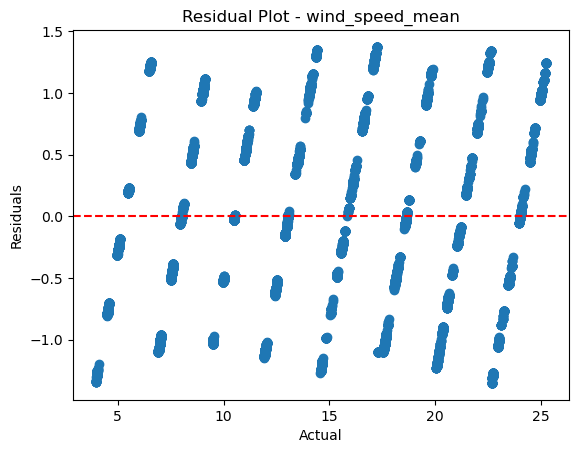

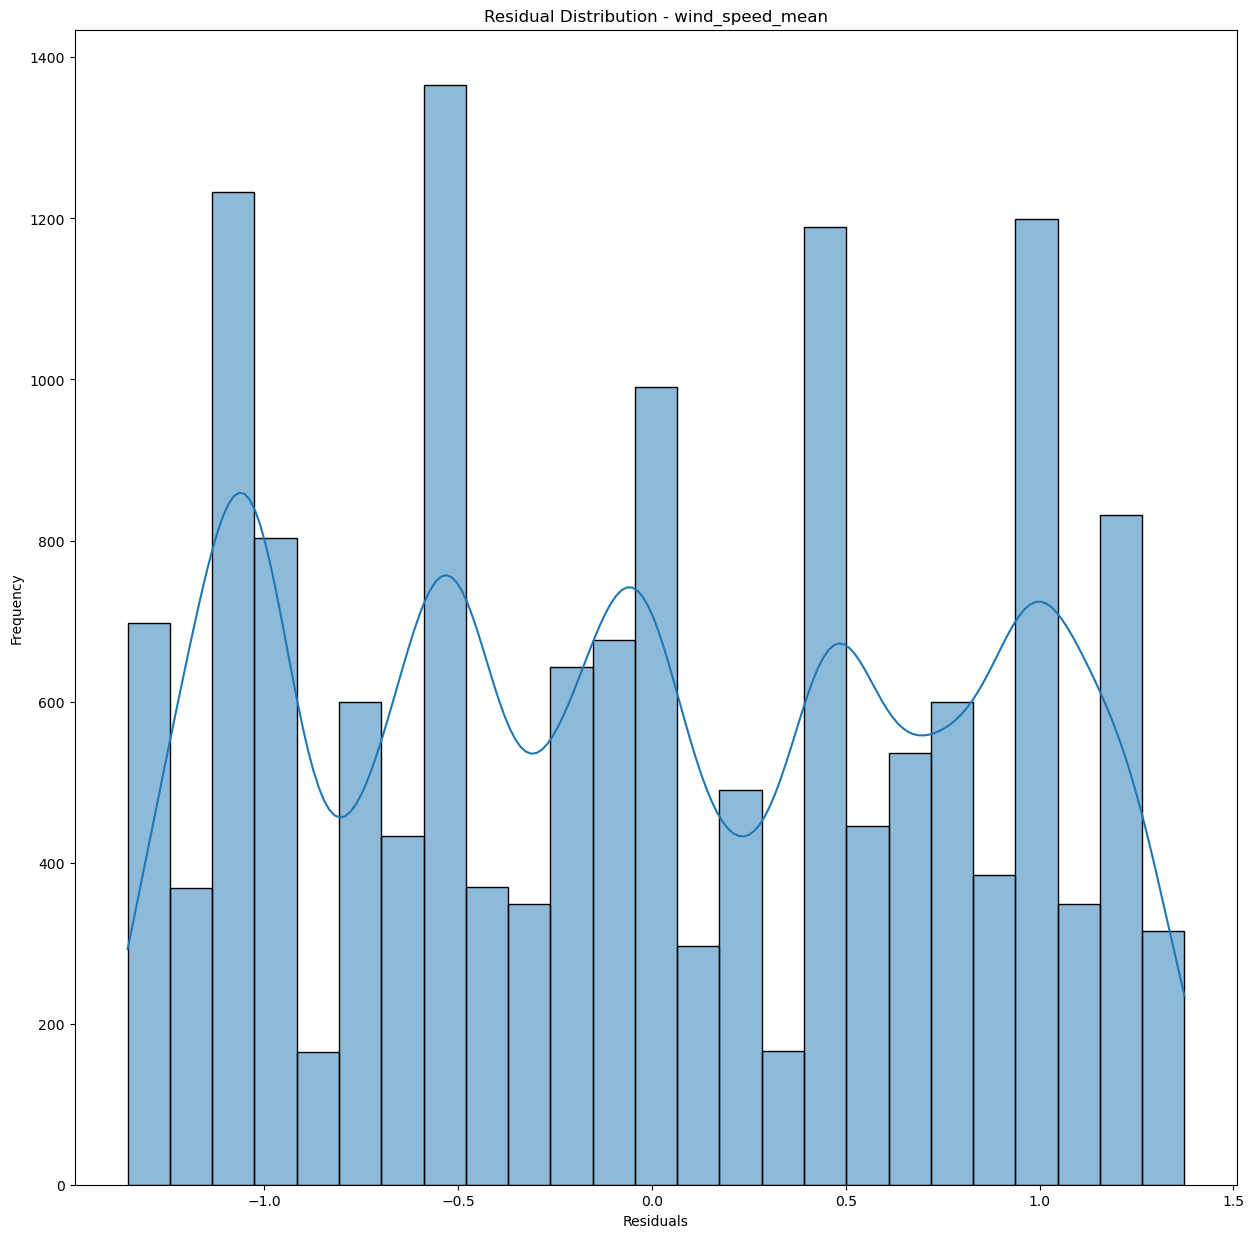

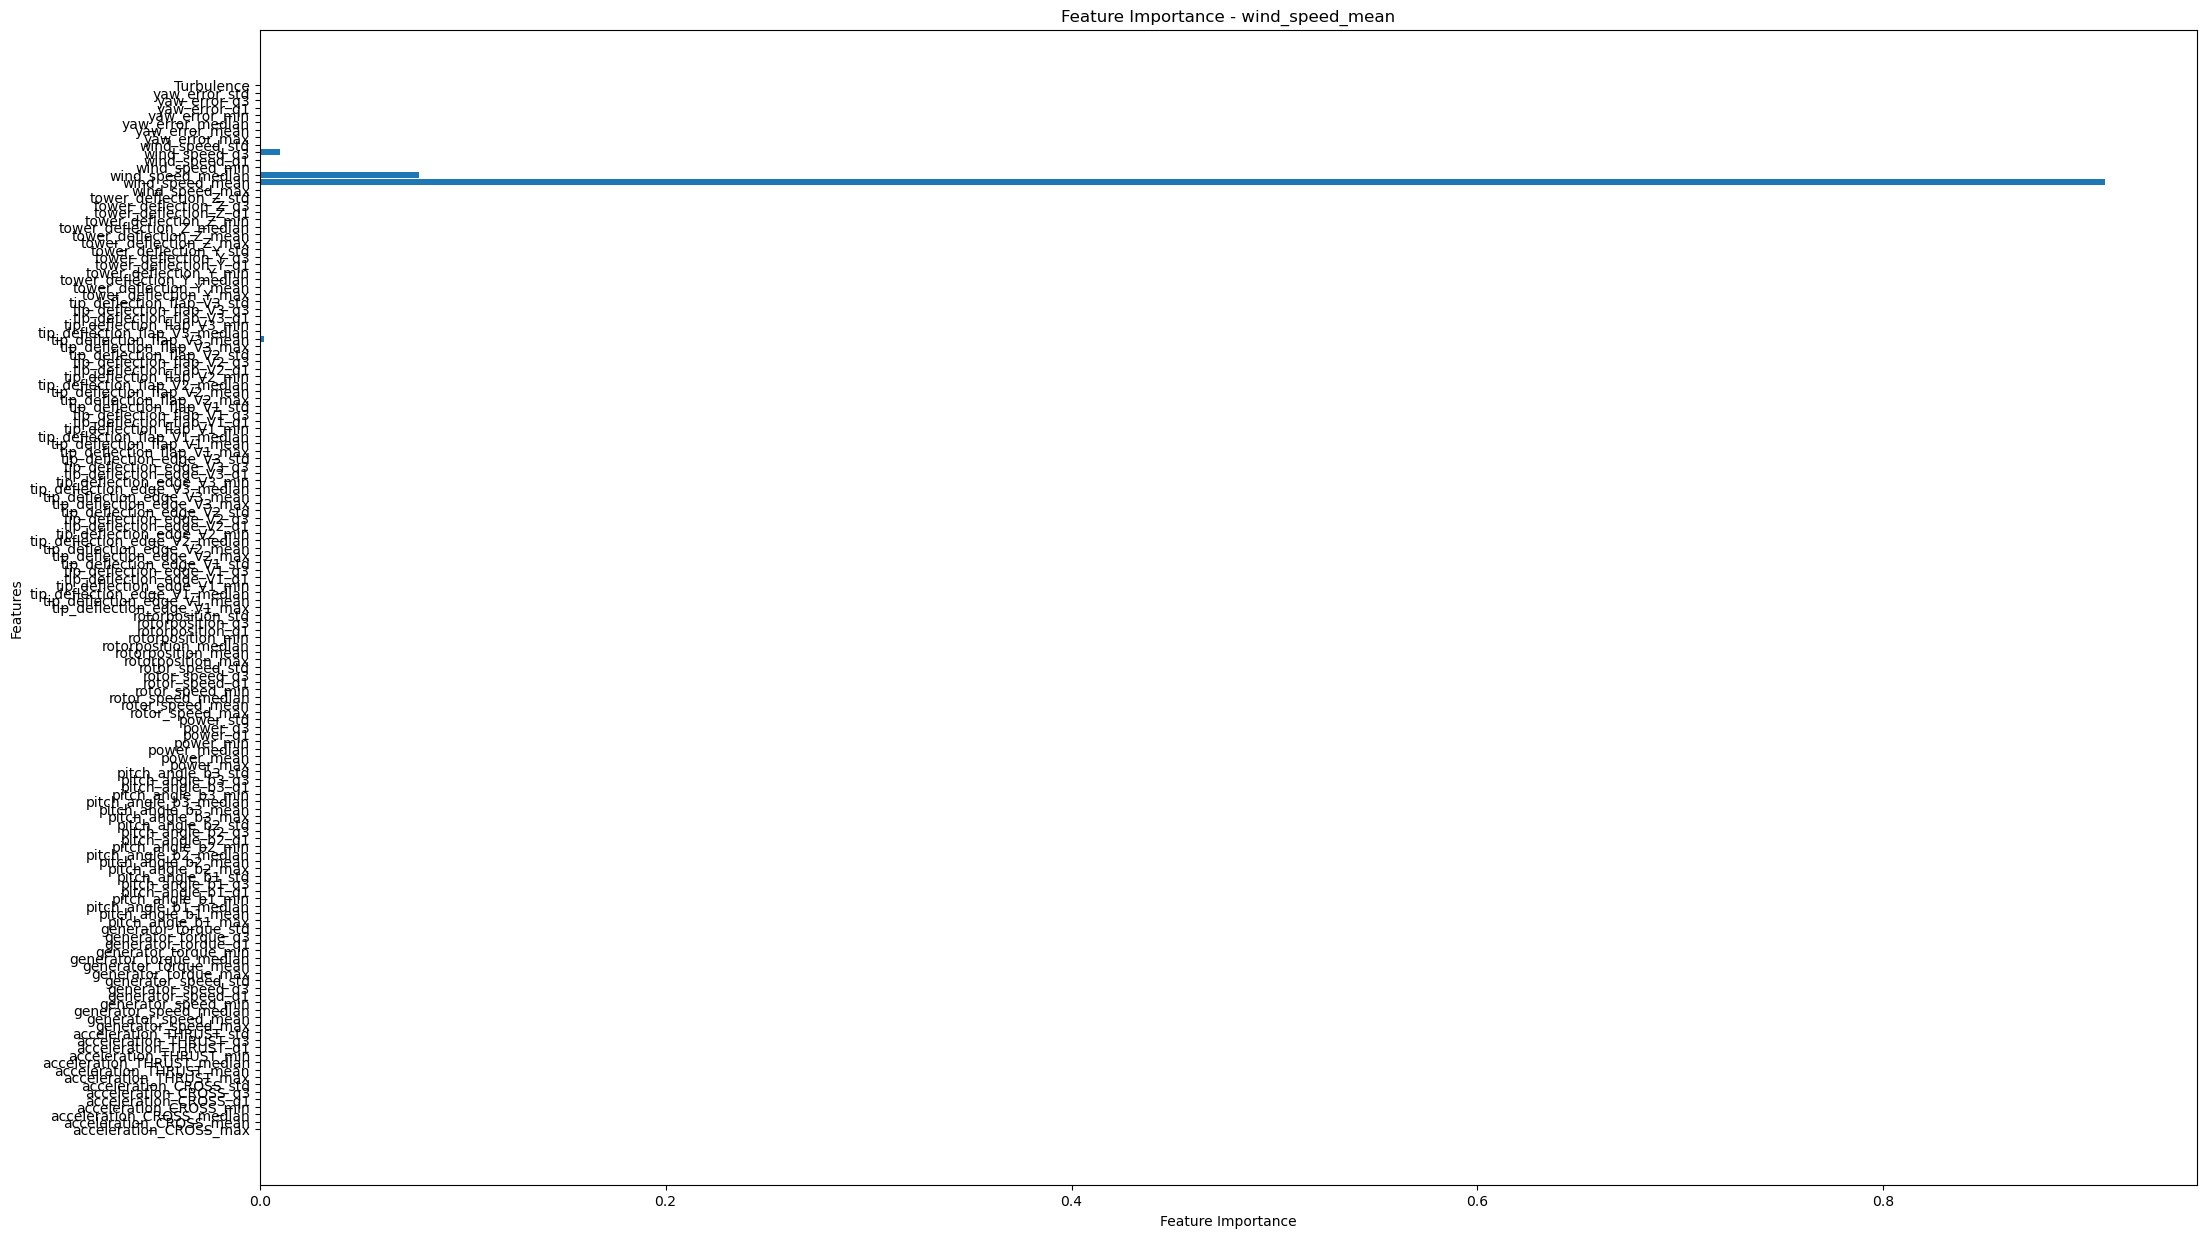

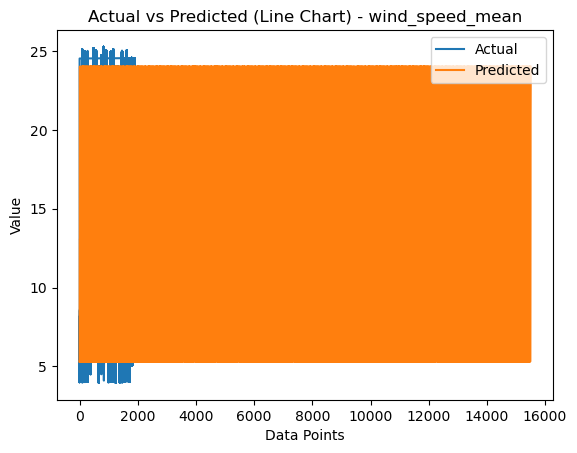

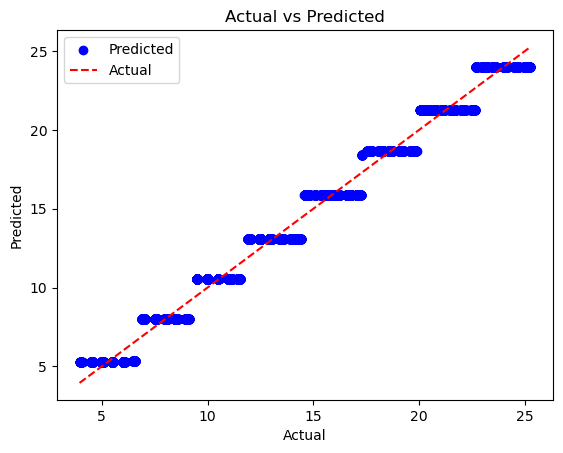

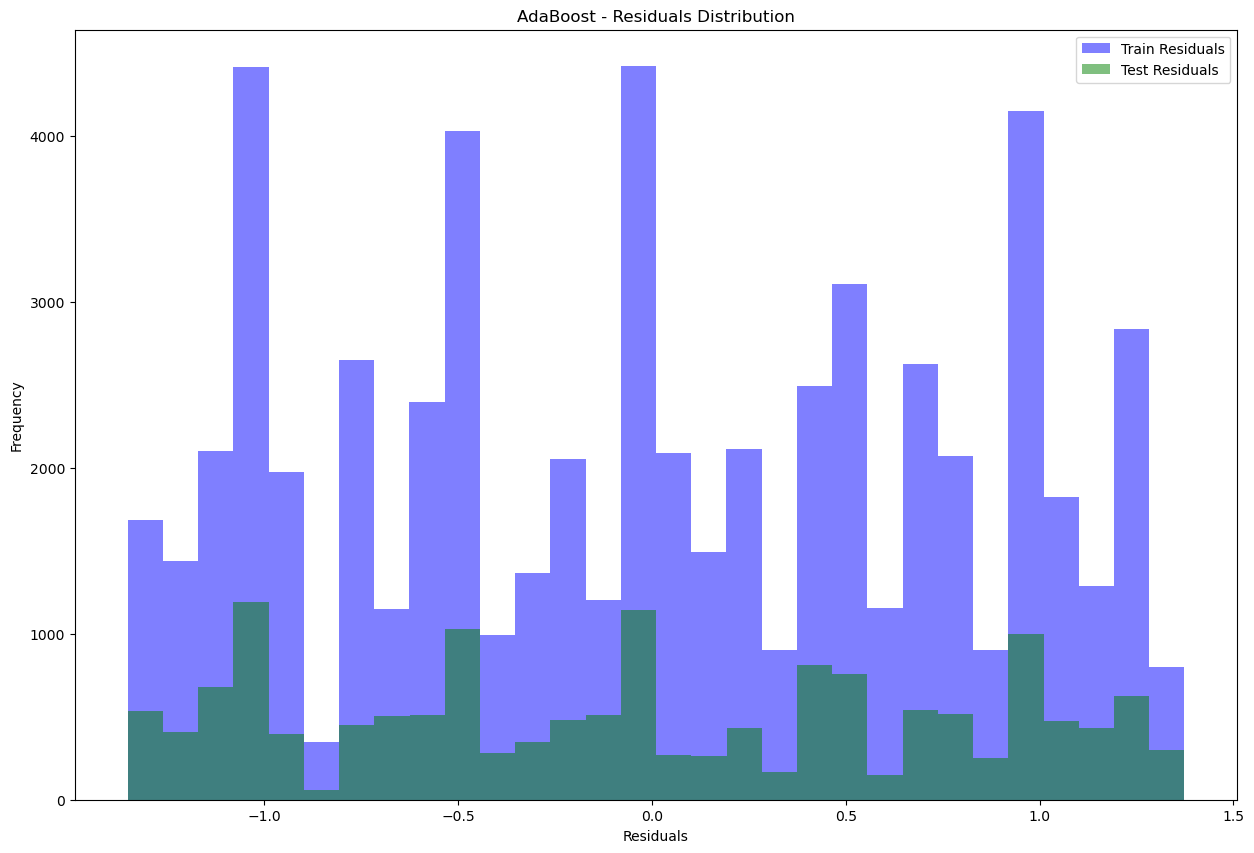

Target Variable: yaw_error_mean
Training MAE: 0.7651325097357434
Training MSE: 0.878405795448914
Training RMSE: 0.937233052900352
Training R2: 0.99372668943355

Test MAE: 0.7652944896984636
Test MSE: 0.8784010759409077
Test RMSE: 0.9372305351091095
Test R2: 0.9937265089160504



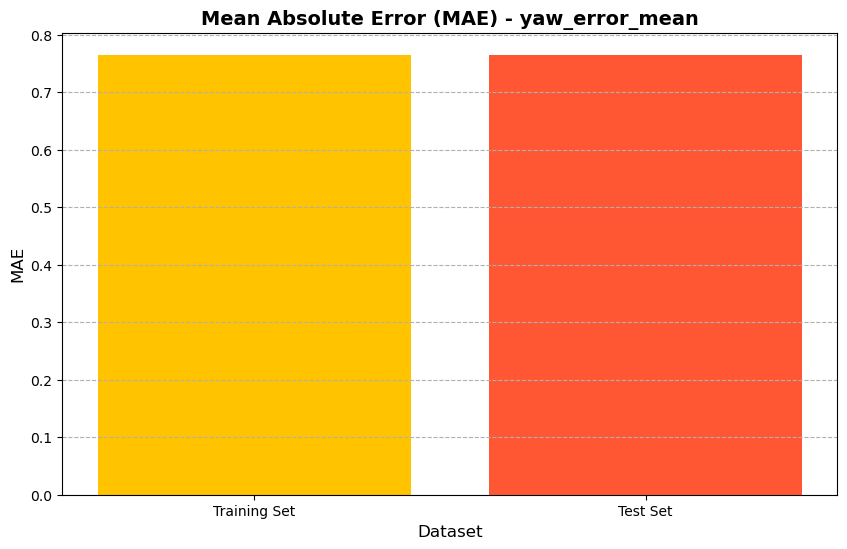

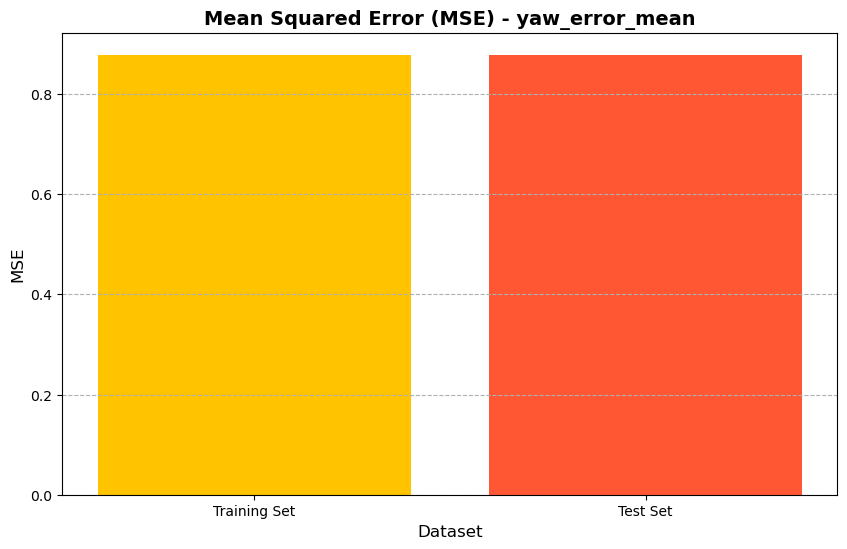

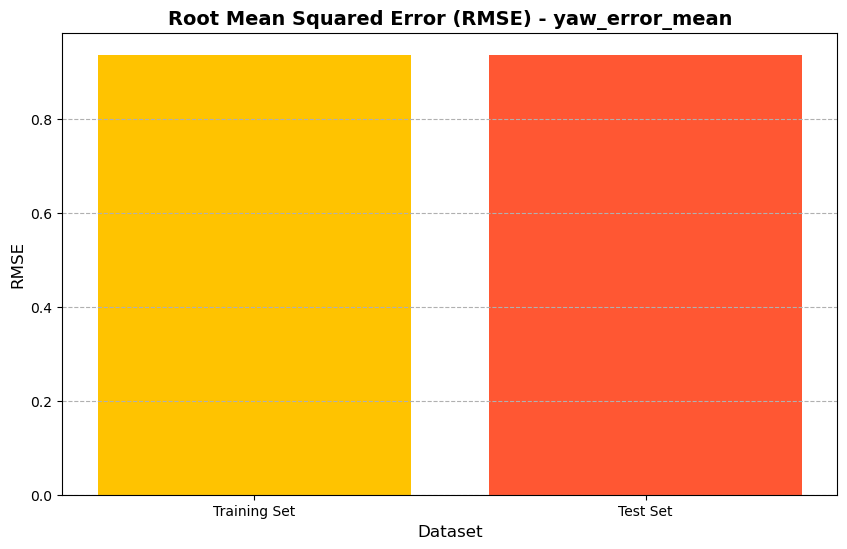

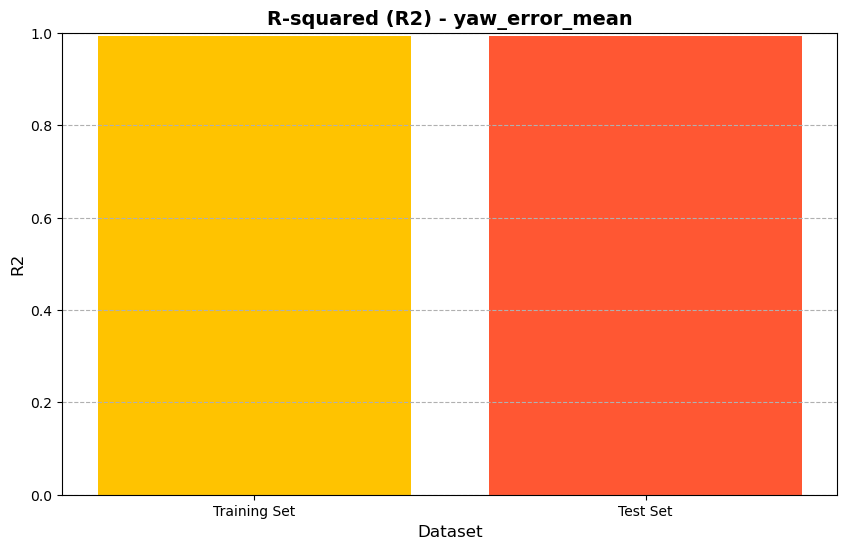

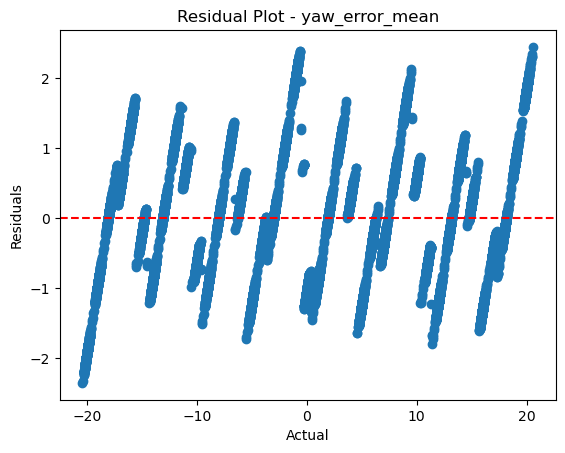

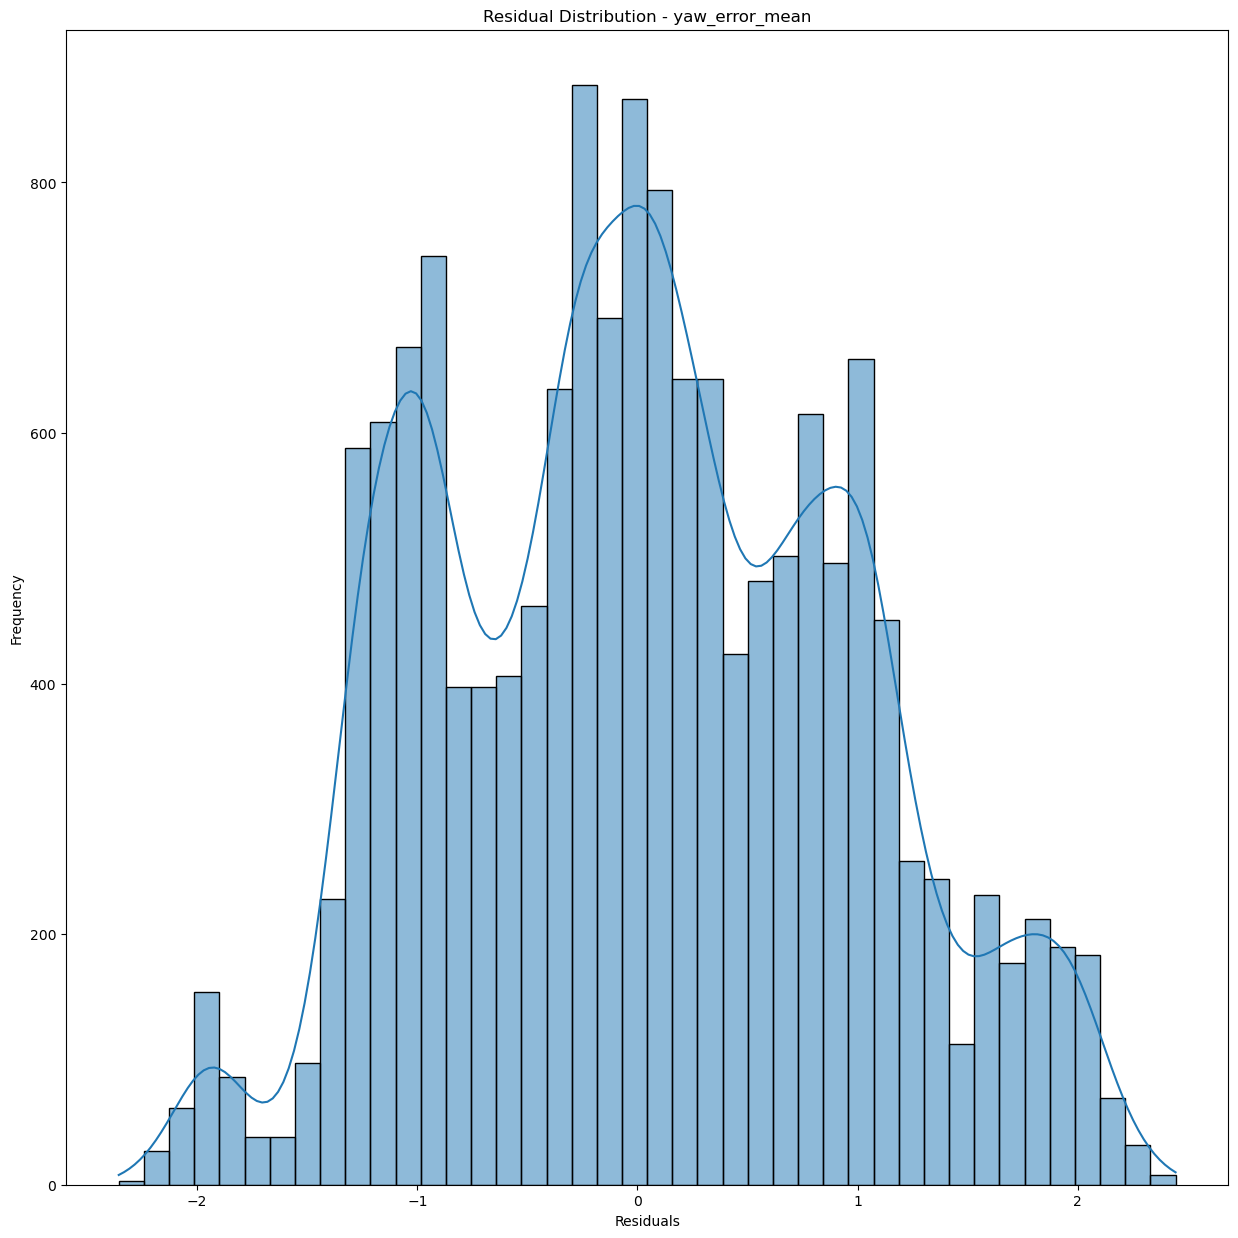

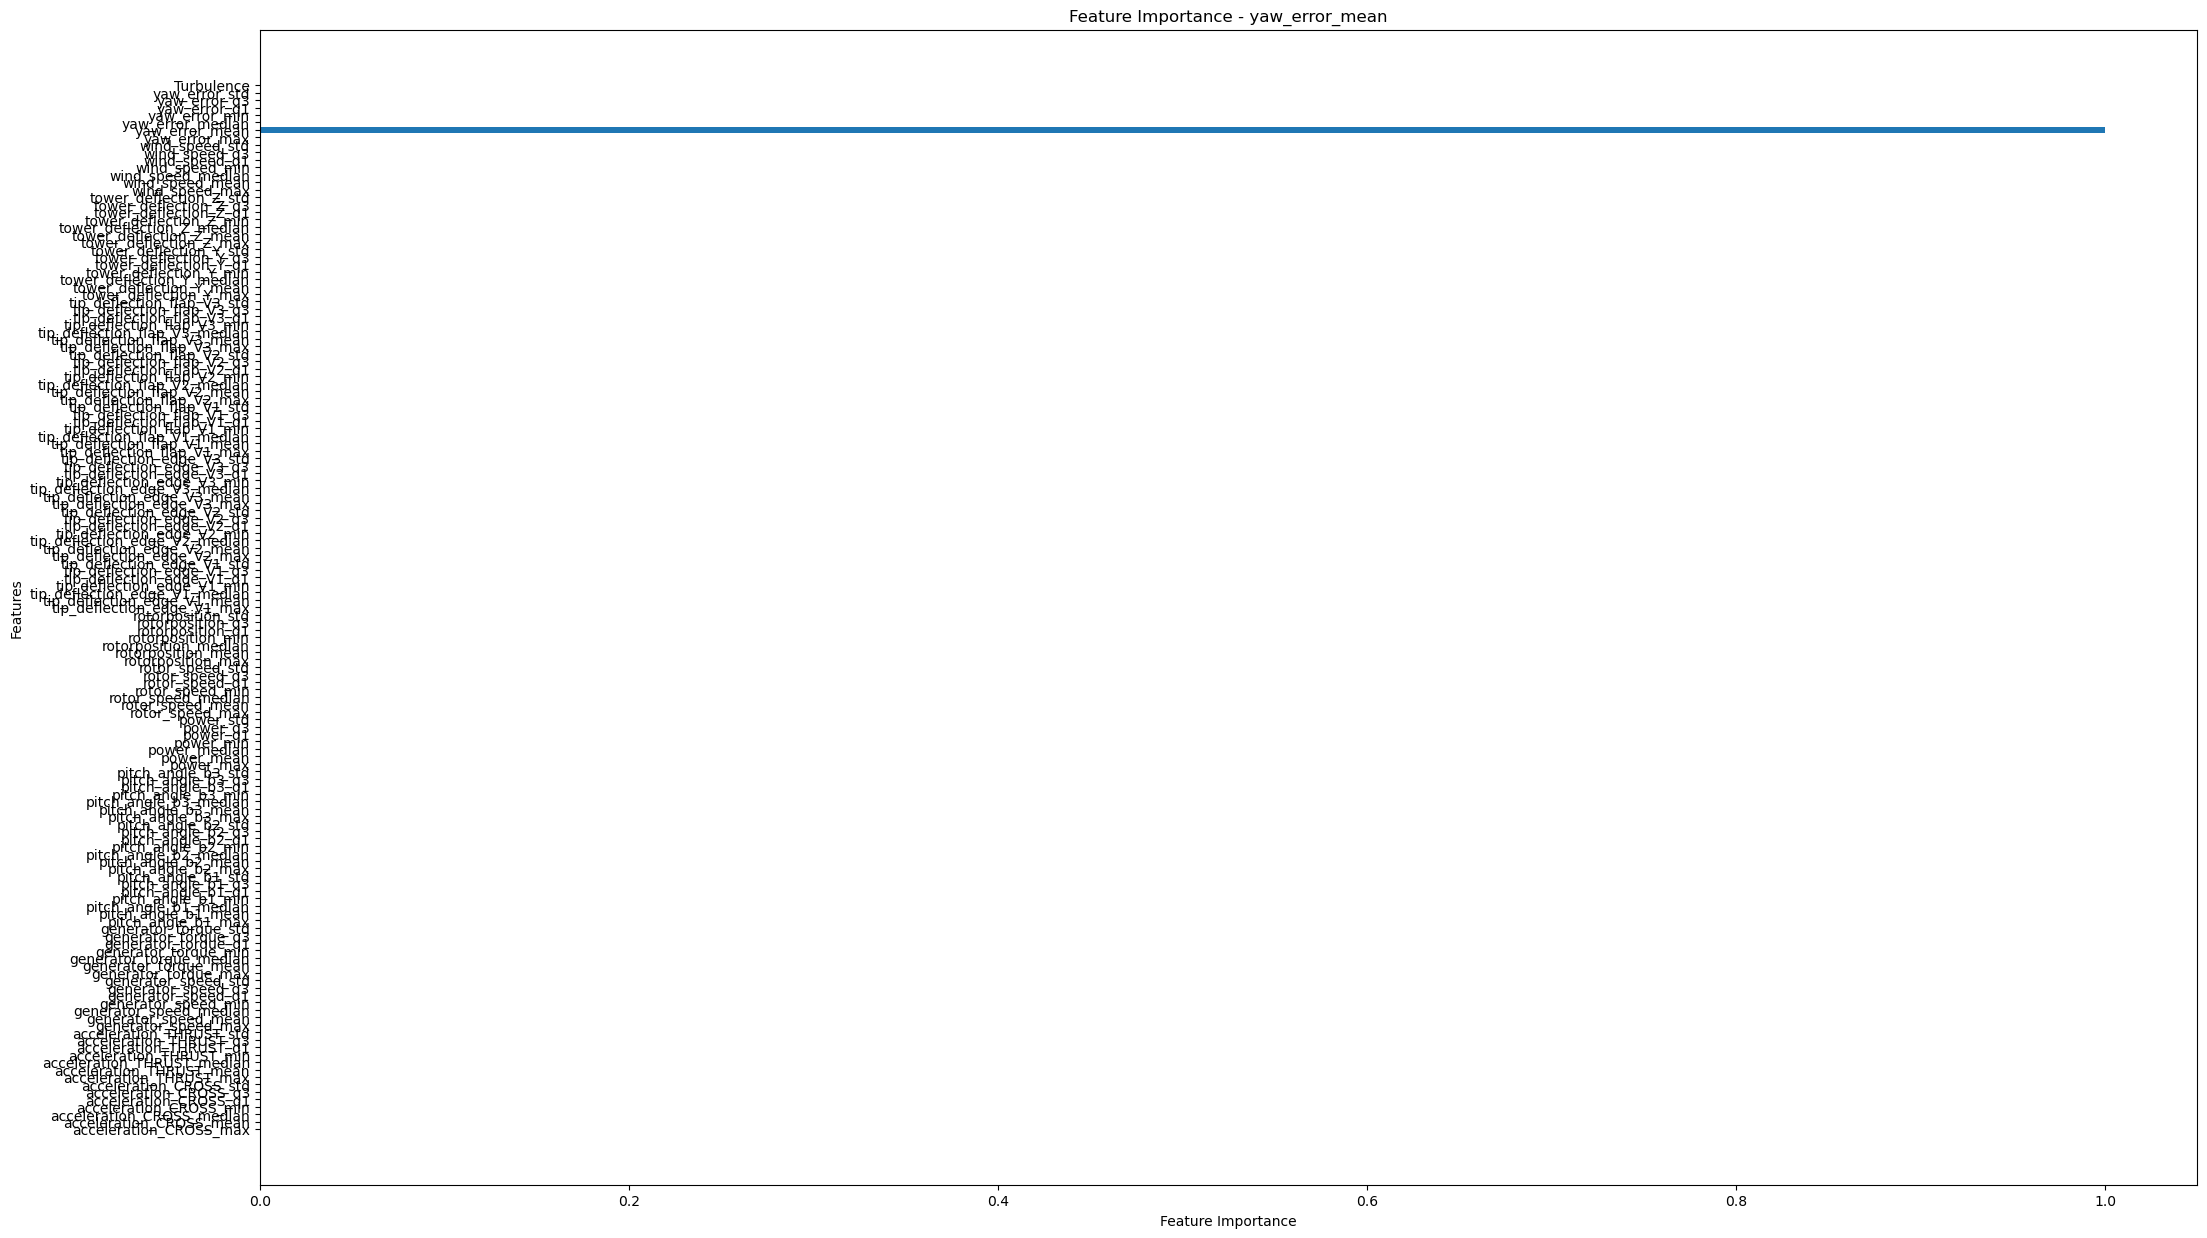

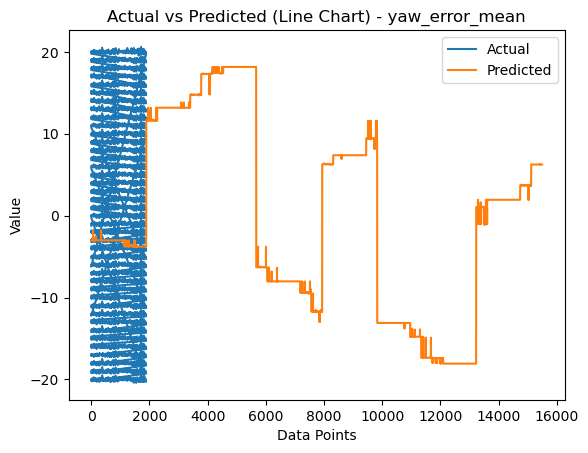

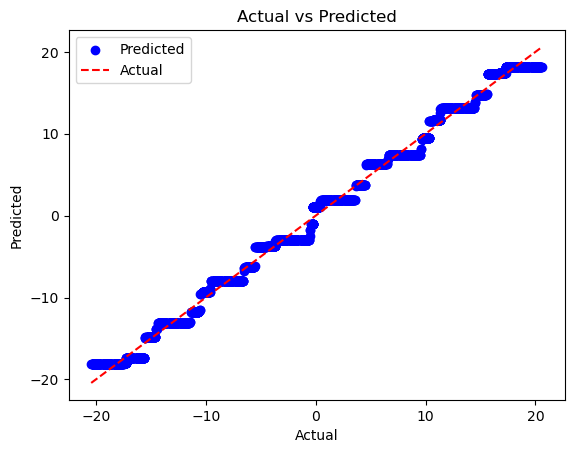

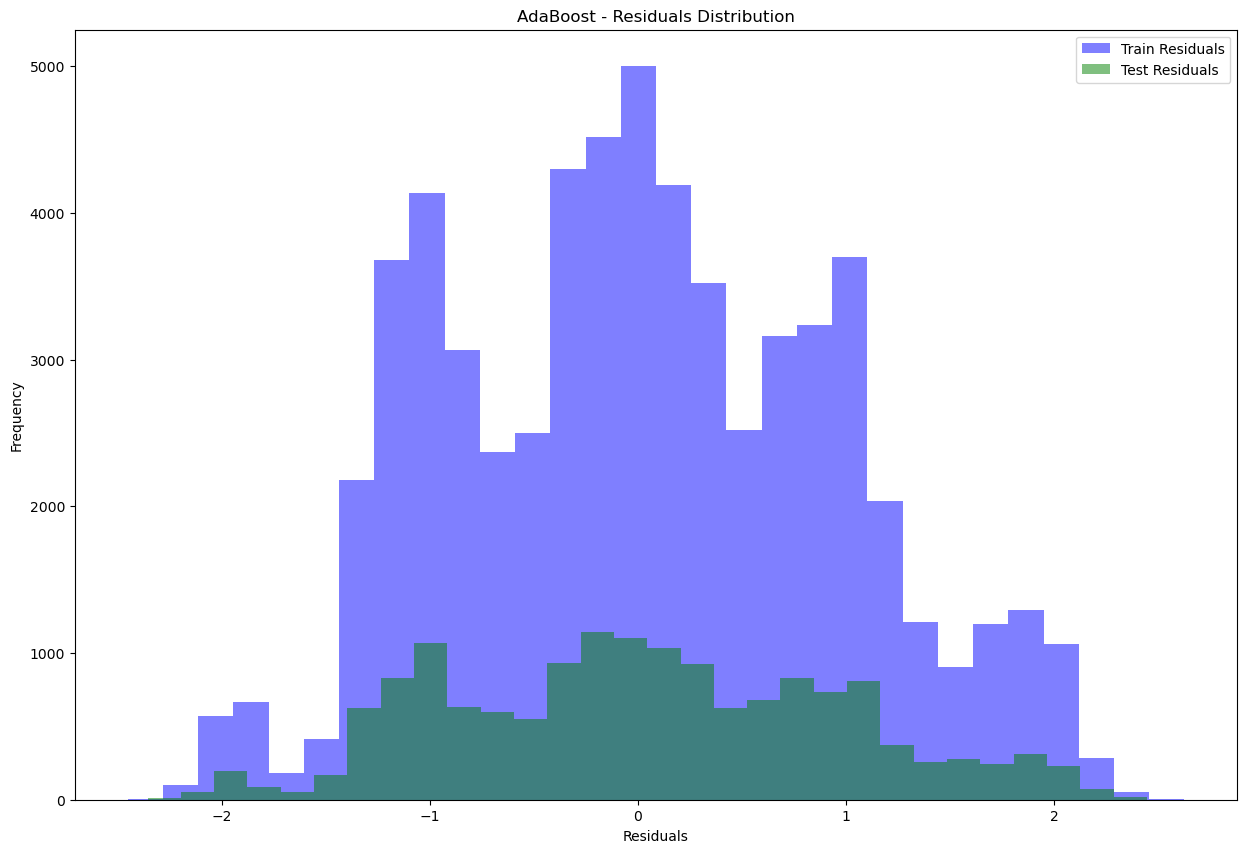

Target Variable: Turbulence
Training MAE: 0.0014951265329636795
Training MSE: 3.4251981817655076e-06
Training RMSE: 0.0018507290946450016
Training R2: 0.9956121297099824

Test MAE: 0.001503849695734216
Test MSE: 3.3330316354727835e-06
Test RMSE: 0.0018256592331190352
Test R2: 0.9955424633730688



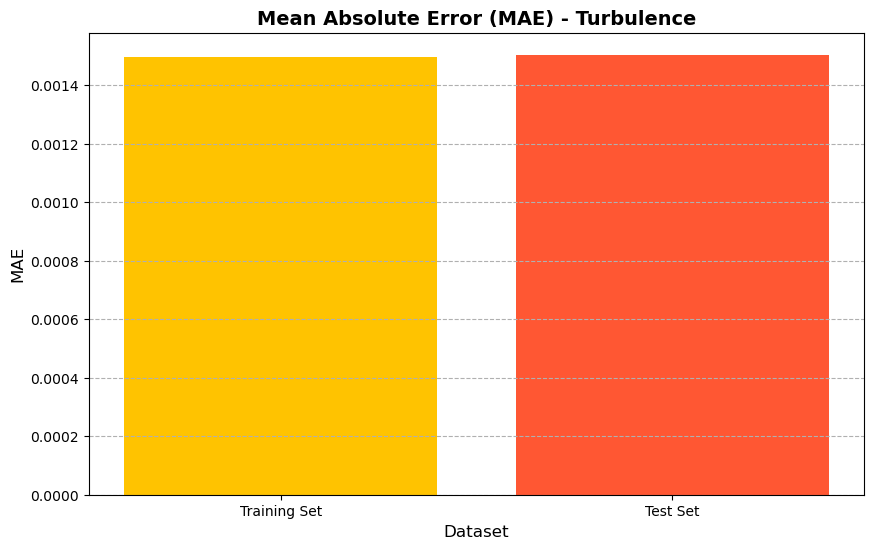

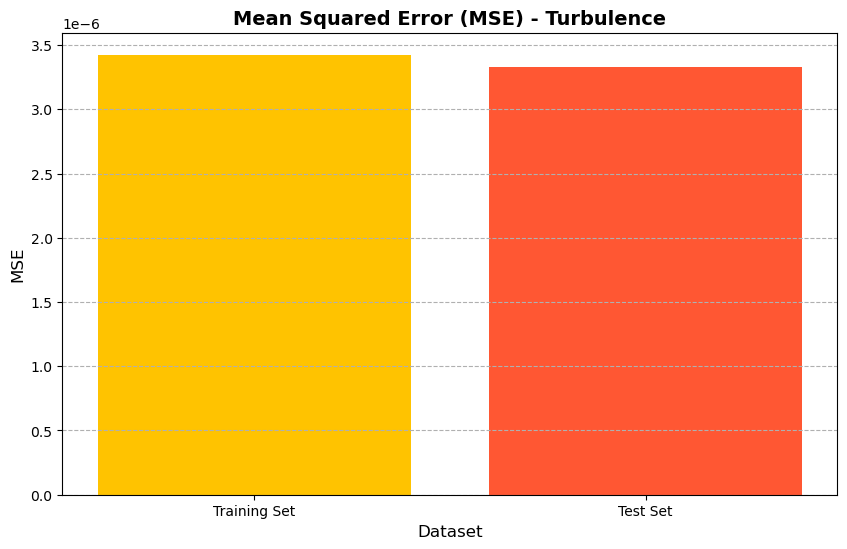

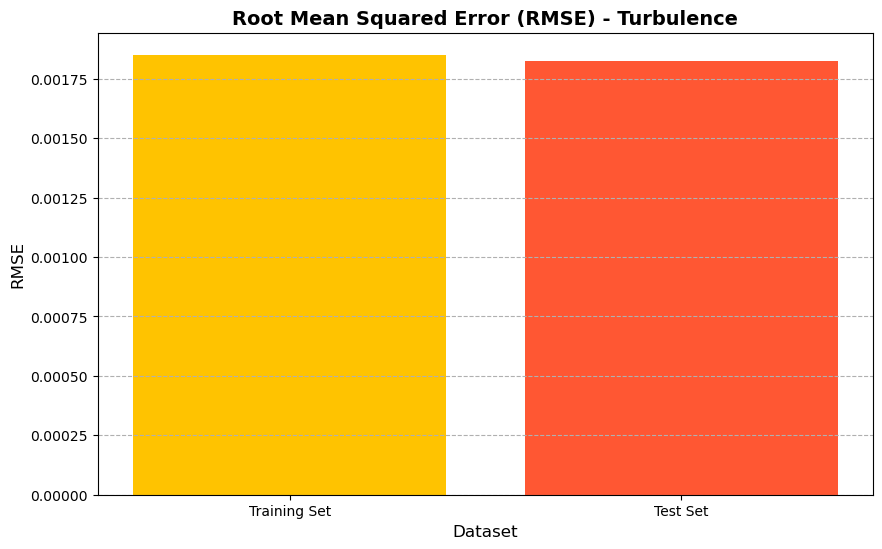

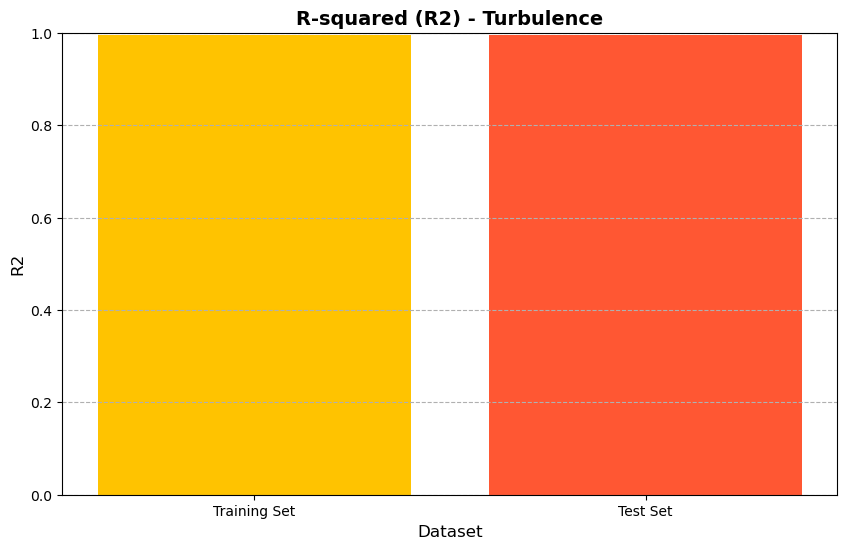

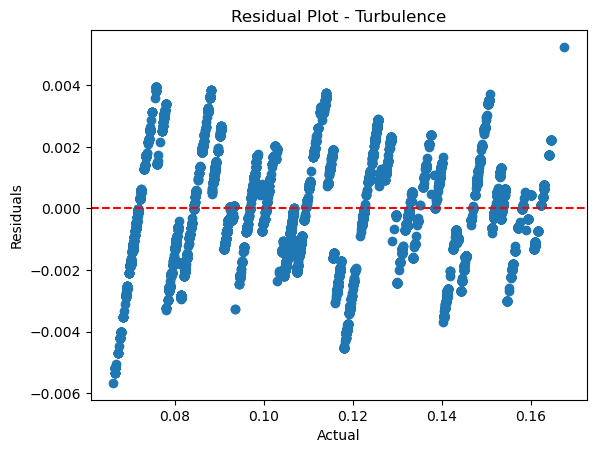

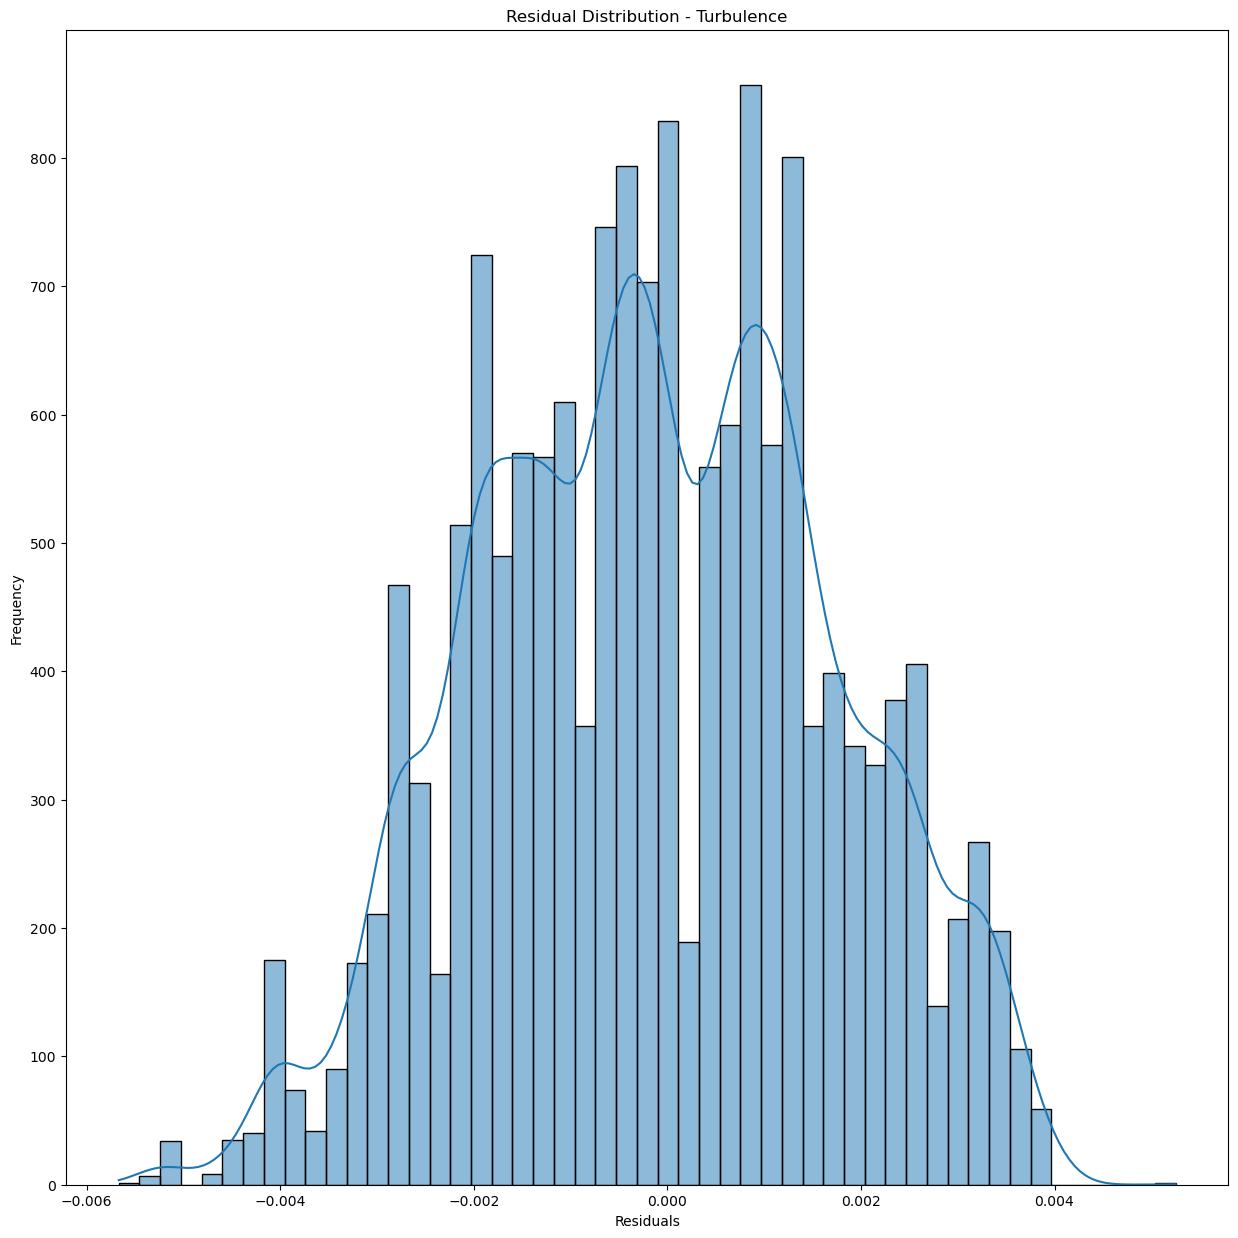

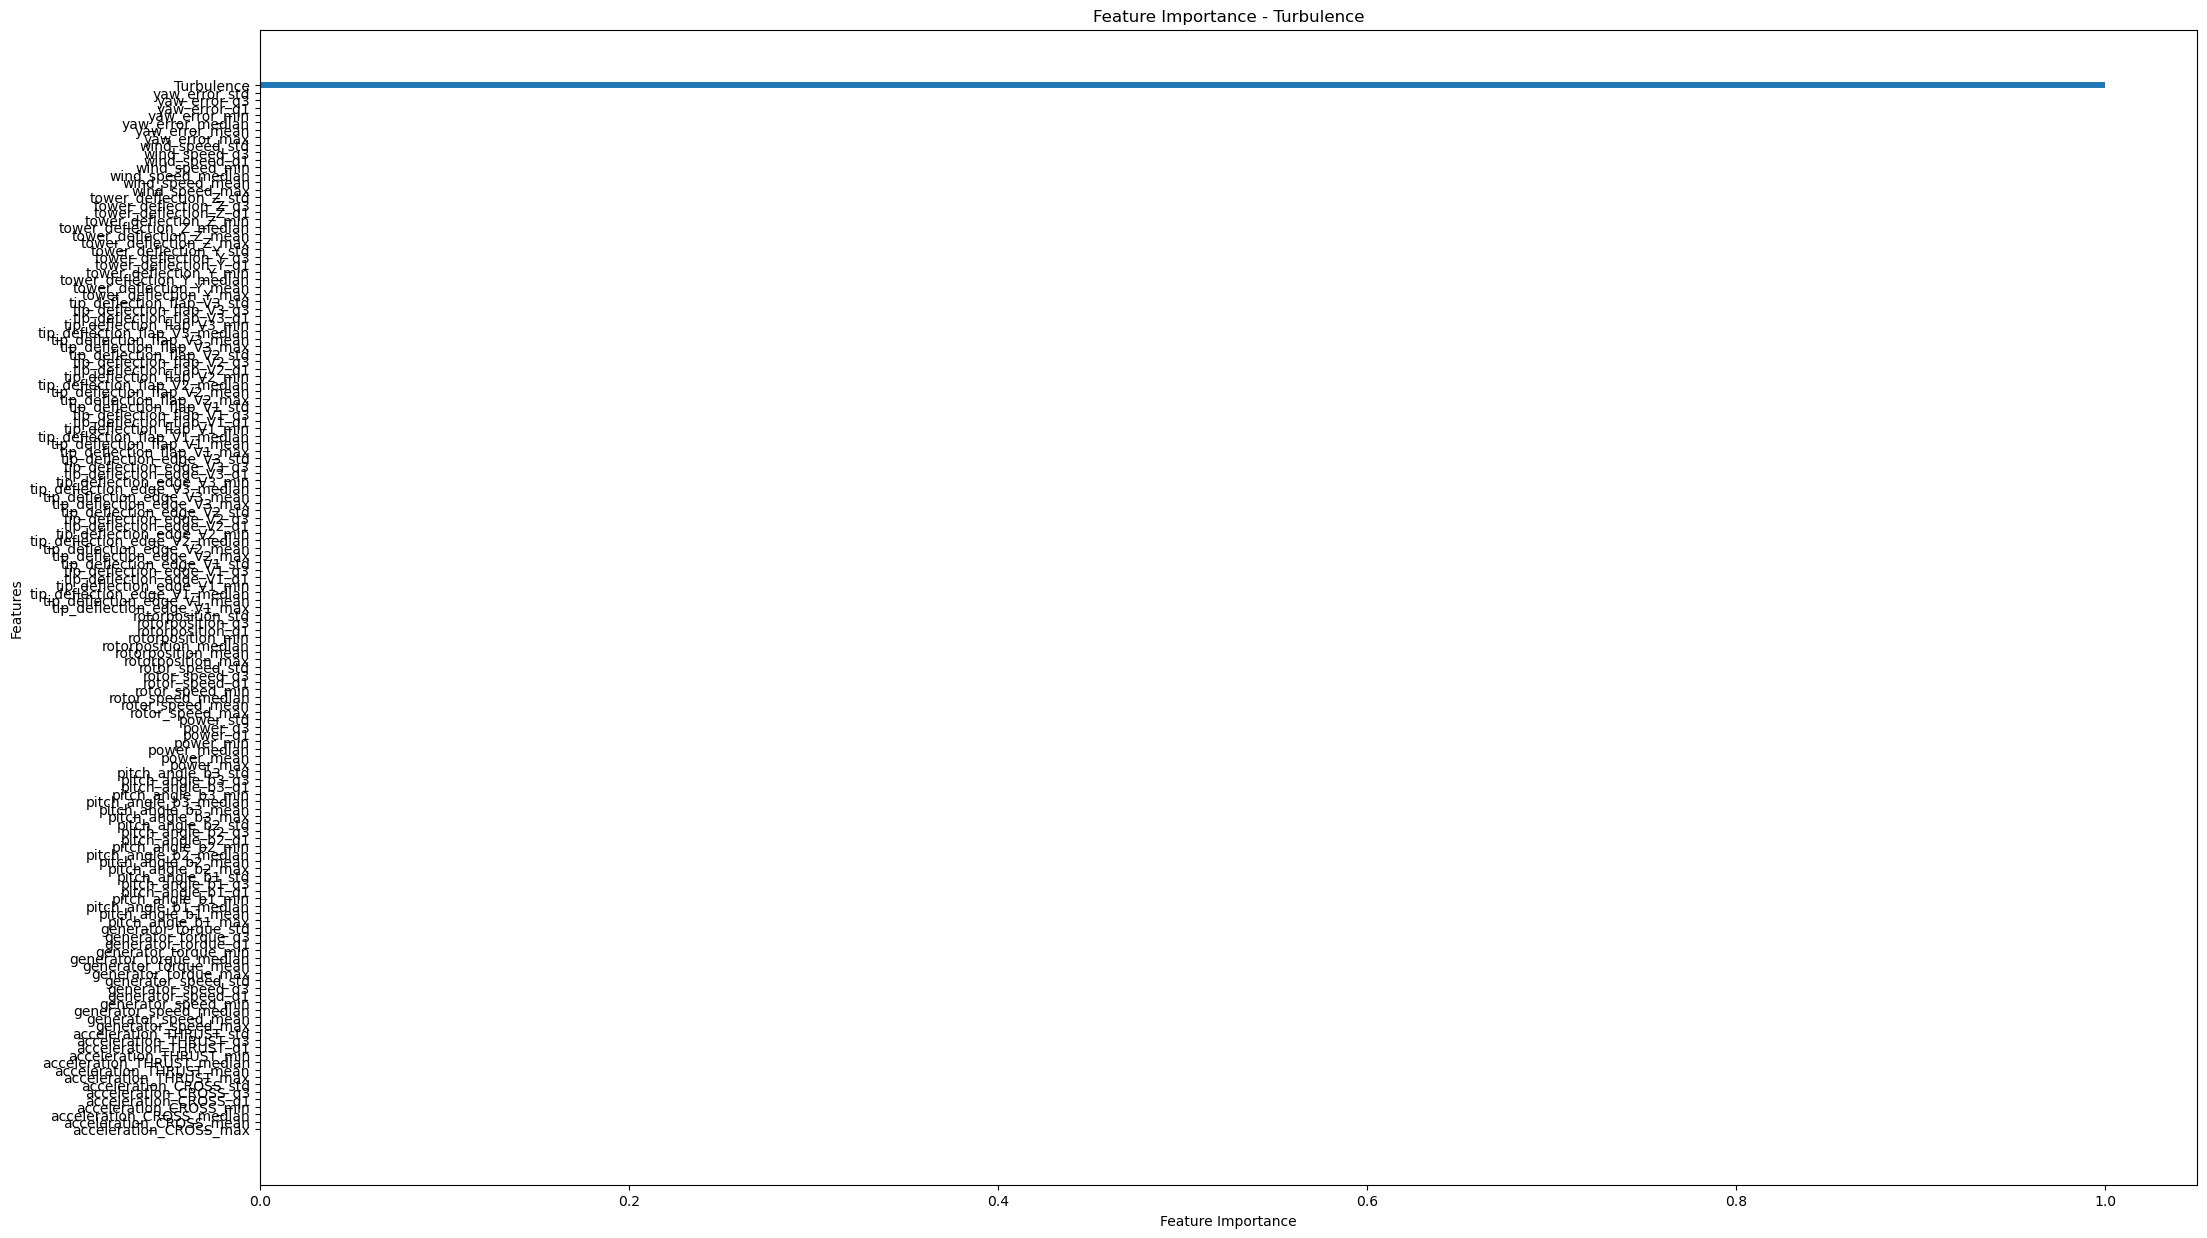

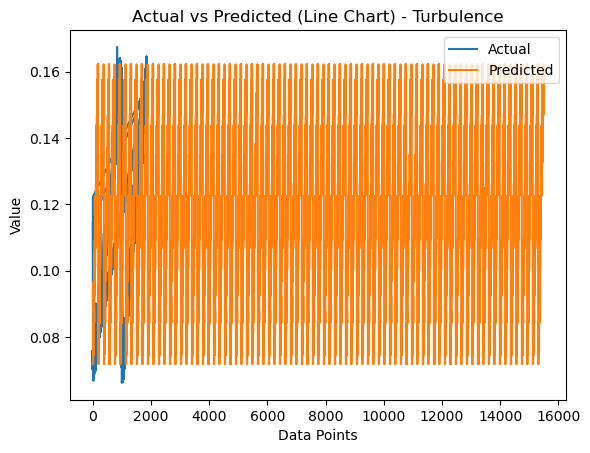

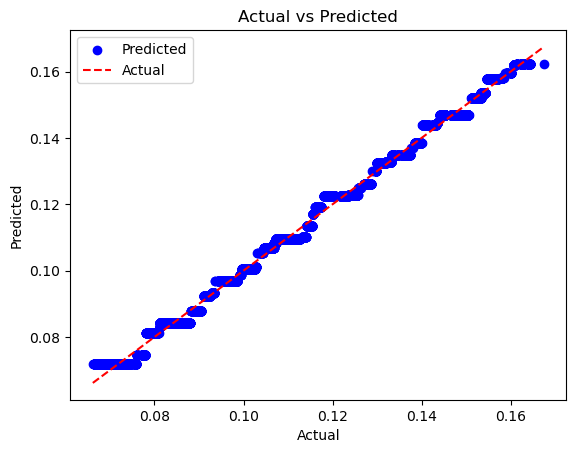

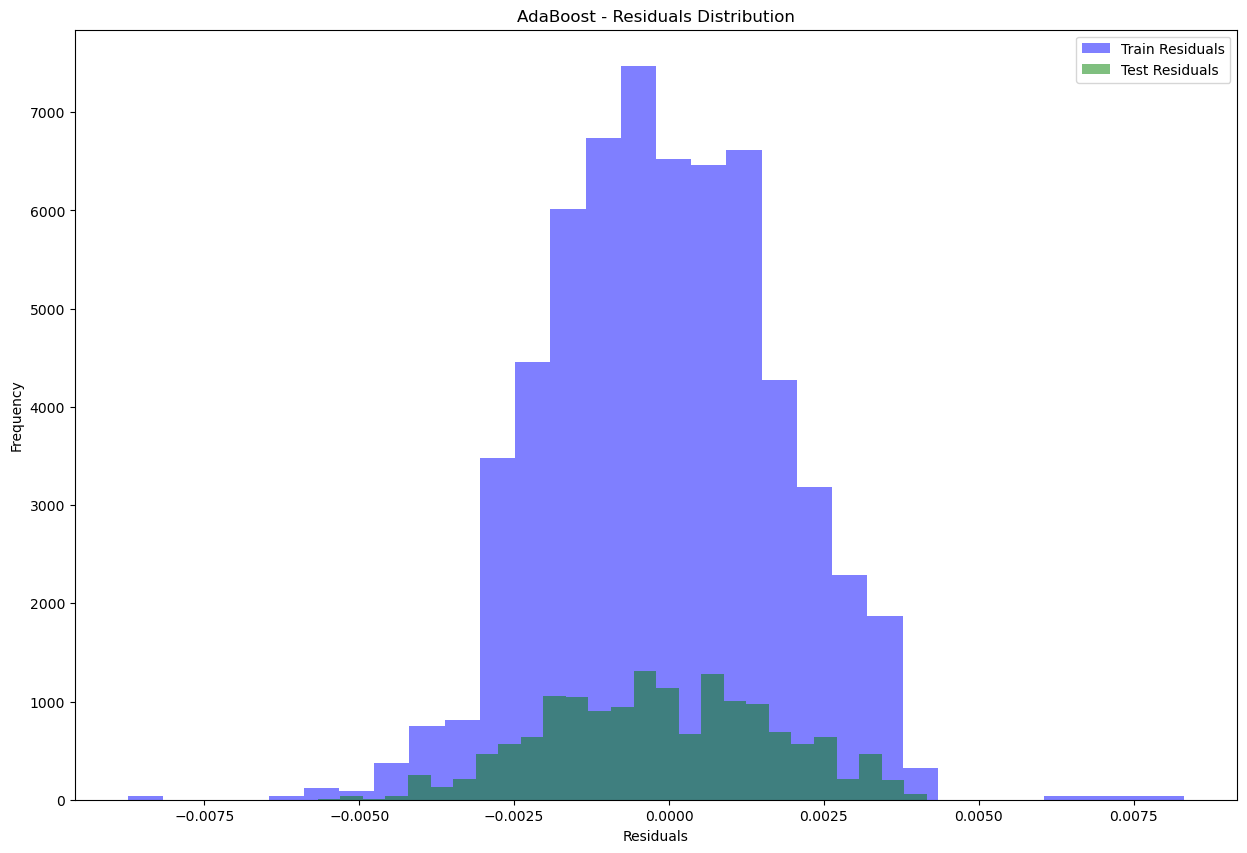

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y

# Assuming you have already loaded and preprocessed your data into big_train_df and big_test_df

# Define the columns to drop (if any)
columns_to_drop = []

targets = ['wind_speed_mean', 'yaw_error_mean', 'Turbulence']

for target_variable in targets:
    X_train, y_train = split_data(big_train_df, target_variable, columns_to_drop)
    X_test, y_test = split_data(big_test_df, target_variable, columns_to_drop)
    
    ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))
    ada_model.fit(X_train, y_train)
    
    train_predictions = ada_model.predict(X_train)
    test_predictions = ada_model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
    train_r2 = r2_score(y_train, train_predictions)
    
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
    test_r2 = r2_score(y_test, test_predictions)
    
    print("Target Variable:", target_variable)
    print("Training MAE:", train_mae)
    print("Training MSE:", train_mse)
    print("Training RMSE:", train_rmse)
    print("Training R2:", train_r2)
    print()
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test RMSE:", test_rmse)
    print("Test R2:", test_r2)
    print()
    
    mae_values = [train_mae, test_mae]
    mse_values = [train_mse, test_mse]
    rmse_values = [train_rmse, test_rmse]
    r2_values = [train_r2, test_r2]

    labels = ['Training Set', 'Test Set']
    x = np.arange(len(labels))

    plt.figure(figsize=(10, 6))
    plt.bar(x, mae_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MAE', fontsize=12)
    plt.title('Mean Absolute Error (MAE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, mse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title('Mean Squared Error (MSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, rmse_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('RMSE', fontsize=12)
    plt.title('Root Mean Squared Error (RMSE) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(bottom=0)
    plt.grid(axis='y', linestyle='--')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(x, r2_values, color=['#FFC300', '#FF5733'])
    plt.xticks(x, labels)
    plt.xlabel('Dataset', fontsize=12)
    plt.ylabel('R2', fontsize=12)
    plt.title('R-squared (R2) - {}'.format(target_variable), fontsize=14, fontweight='bold')
    plt.ylim(top=1)
    plt.grid(axis='y', linestyle='--')
    plt.show()
    
    residuals = y_test - test_predictions

    plt.scatter(y_test, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.title('Residual Plot - {}'.format(target_variable))
    plt.show()

    plt.figure(figsize=(15, 15))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution - {}'.format(target_variable))
    plt.show()

    feature_importances = ada_model.feature_importances_
    feature_names = X_train.columns

    plt.figure(figsize=(25, 15))
    plt.barh(feature_names, feature_importances)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance - {}'.format(target_variable))
    plt.show()

    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted (Line Chart) - {}'.format(target_variable))
    plt.legend()
    plt.show()

    plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.legend()
    plt.show()

    train_residuals = y_train - train_predictions
    test_residuals = y_test - test_predictions

    plt.figure(figsize=(15, 10))
    plt.hist(train_residuals, bins=30, alpha=0.5, label='Train Residuals', color='blue')
    plt.hist(test_residuals, bins=30, alpha=0.5, label='Test Residuals', color='green')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('AdaBoost - Residuals Distribution')
    plt.legend()
    plt.show()
